## **Trabajo Práctico: La Gran Prueba de Sabor**

Paredes, Julian




# **Presentación**



**Una consultora** ha sido contratada para realizar un **análisis de mercado** y **proporcionar recomendaciones estratégicas** para la apertura de una cafetería en EE.UU.  

Se le solicitó llevar a cabo un estudio utilizando los datos de la encuesta [**"La Gran Prueba de Sabor"**](https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv), con el fin de extraer información sobre las preferencias de los consumidores y ayudar al grupo inversor a diseñar una estrategia informada para su incursión en el sector. Esta encuesta la realizó el famoso barista *James Hoffmann* en octubre de 2023, durante una transmisión en vivo con unas *4.000 personas* en Estados Unidos.

#**Objetivo del Proyecto Final**

En este Proyecto Final, el alumno asumirá el rol de consultor. Para la lectura, manipulación y análisis de los datos de la encuesta se debe usar el paquete Pandas.

#**Consignas**



1. Descargar el archivo de la encuesta ejecutando el código que se propone a continuación.


In [1]:
#No modificar este código que le permitirá bajar el archivo que necesita para trabajar

import requests

url_coffee_survey = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv"
archivo_salida_coffee_survey = "coffee_survey.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

descargarCSV(url_coffee_survey,archivo_salida_coffee_survey)


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Una vez descargado el archivo analice su contenido. ¿Qué información brinda de cada persona encuestada? ¿Todos los encuestados respondieron a todas las preguntas?  


  Ahora haremos una **exploración guiada de la encuesta utilizando `Pandas`**. En los siguientes ejercicios no puede usar estructuras de repetición (`for`, `while`, etc), salvo que el enunciado indique explícitamente lo contrario.

4. Cargue la información del archivo *coffee_survey.csv* en un `DataFrame` llamado `encuesta`.
5. Utilice el método `info` sobre el `DataFrame` cargado con los datos de la encuesta. ¿Qué información importante nos brinda este método sobre los datos recién cargados? Comente.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("coffee_survey.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

Haga aquí sus comentarios sobre la información devuelta por el método `info`: *completar*

6. Analice la columna *'age'* que indica el rango de edad del encuestado. ¿Qué cantidad de los encuestados que brindaron esta información pertenecen a los rangos *'<18 years old'*, *'18-24 years old'*, *'25-34 years old'*, *'35-44 years old'*, *'45-54 years old'*, *'55-64 years old'* y *'>65 years old'*, respectivamente? Ignore los valores *'NA'*.

In [3]:
# 6. Analizar la columna 'age'
#edades_encuestados = df.groupby("age")["age"].count()
#o sino
edades_encuestados = df["age"].value_counts()
edades_encuestados.sort_values(ascending=False)


,count
age,
25-34 years old,1986
35-44 years old,960
18-24 years old,461
45-54 years old,302
55-64 years old,187
>65 years old,95
<18 years old,20


7. Analice la columna 'where_drink' que indica dónde toman café los encuestados. ¿Qué diferencia encuentra entre esta columna de la anterior? ¿Qué cantidad de los encuestados que respondieron a esta pregunta toman el café *'On the go'*, *'At a cafe'*, *'At the office'*, *'At home'*, *'None of these'*, respectivamente? Ignore los valores *'NA'*.



In [4]:
# 7. Analizar la columna 'where_drink'
encuestados_where_drink = df["where_drink"].dropna()
encuestados_where_drink = encuestados_where_drink.str.split(",") #aca estoy separando el texto en los distintos lugares
encuestados_where_drink = encuestados_where_drink.explode().str.strip() #con el metodo explode podriamos decir que pasamos una tabla desnormalizada a 1era forma normal, ya que hace que cada entrada sea atomica para la columna where_drink, y luego el metodo str.strip ya que algunas celdas contenian espacios en blanco antes o despues cada entrada
encuestados_where_drink.value_counts()

,count
where_drink,
At home,3644
At the office,1430
At a cafe,1170
On the go,705
None of these,36


8. Analice los códigos propuestos para responder a las consignas 6. y 7. Son similares, ¿verdad? Proponga una función `procesar_columna`, que recibiendo el `DataFrame` y el nombre de la columna a analizar, sirva para resolver los dos casos anteriores.

In [5]:
# 8. Función para procesar cualquier columna

def procesar_columna(dataframe, columna):
  # Elimino valores NA para limpiar la serie
  serie_columna = dataframe[columna].dropna()

  # Verifica si algún valor en la columna contiene una coma, lo que indica múltiples selecciones y el astype lo convierte momentaneamente a string para manejar posibles tipos de datos no string, ya que contains funciona solo con strings, por ultimo, el metodo any verifica si alguno de los resultados que devuelve la serie booleana es True, si resulta que si entonces tiene datos separables
  if serie_columna.astype(str).str.contains(',').any():
    # aplico split, explode y strip para columnas con múltiples valores todo en una sola linea
    resultado = serie_columna.str.split(',').explode().str.strip().value_count()
  else:
    # Aplico unicamente value_counts para columnas con valores únicos o sea que no tienen comas
    resultado = serie_columna.value_counts()
  return resultado

9. Pruebe la función anterior, analizando las columnas *'gender'* y *'cups'*. ¿Funciona?

In [6]:
# 9. Pruebas de la función
tazas = procesar_columna(df,"cups")
print(tazas)
generos = procesar_columna(df,"gender")
print(generos)

cups
2              1663
1              1277
3               473
Less than 1     348
4               121
More than 4      67
Name: count, dtype: int64
gender
Male                      2524
Female                     853
Non-binary                 103
Prefer not to say           33
Other (please specify)      10
Name: count, dtype: int64


10. Implemente una función llamada `filtrar_columna_valor` que reciba un `DataFrame`, el nombre de una columna y un valor para dicha columna como argumentos. La función debe filtrar las filas, devolviendo sólo aquellas que hayan pasado el filtro aplicado. Hacer dos pruebas, filtrando por `gender` igual a `Female` y `gender` igual a `Male`. Mostrar en pantalla los primeros 5 registros de cada resultado obtenido.

In [7]:
# 10. Filtrar encuesta
def filtrar_columna_valor(dataframe, columna, valor):
  """recibe un DataFrame, el nombre de una columna y un valor para dicha columna como argumentos. La función debe filtrar las filas, devolviendo sólo aquellas que hayan pasado el filtro aplicado."""
  df = dataframe[dataframe[columna] == valor ]
  return df




In [8]:
df_Female = filtrar_columna_valor(df,"gender", "Female")
df_Female.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
17,QA5JYA,25-34 years old,1,"At home, At the office, On the go","Pour over, Coffee brewing machine (e.g. Mr. Co...",NaN,"National chain (e.g. Starbucks, Dunkin), Local...",NaN,Regular drip coffee,NaN,...,NaN,NaN,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
53,WApbYk,35-44 years old,1,"At the office, At home",Other,Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,1,No affiliation
63,NABN5G,45-54 years old,More than 4,At home,"Pod/capsule machine (e.g. Keurig/Nespresso), O...",Aeropress,NaN,NaN,Americano,NaN,...,$100-$300,Yes,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,vNx8Xv,35-44 years old,1,At home,French press,NaN,NaN,NaN,Cold brew,NaN,...,$50-$100,Yes,Female,NaN,Bachelor's degree,White/Caucasian,NaN,Unemployed,1,Democrat
82,7d97lZ,25-34 years old,2,"At home, At the office",Coffee extract (e.g. Cometeer),NaN,NaN,NaN,Americano,NaN,...,$20-$50,No,Female,NaN,Doctorate or professional degree,Asian/Pacific Islander,NaN,Employed full-time,NaN,Democrat


In [9]:
df_male = filtrar_columna_valor(df,"gender", "Male")
df_male.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
34,ylqbBg,45-54 years old,2,"At home, At the office, At a cafe, On the go","Pour over, French press, Espresso",NaN,"Local cafe, Specialty coffee shop",NaN,Regular drip coffee,NaN,...,$500-$1000,Yes,Male,NaN,Master's degree,Other (please specify),Mix,Employed full-time,2,No affiliation
41,YZzBdN,25-34 years old,2,"At home, At the office","Pour over, Espresso",NaN,NaN,NaN,Pourover,NaN,...,$50-$100,Yes,Male,NaN,Master's degree,Asian/Pacific Islander,NaN,Unemployed,NaN,Independent
42,VZ17Z6,35-44 years old,1,"At the office, At home",Pour over,NaN,NaN,NaN,Iced coffee,NaN,...,$100-$300,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,3,No affiliation
43,RzBeZj,45-54 years old,More than 4,At home,"Pour over, French press, Pod/capsule machine (...",NaN,NaN,NaN,Pourover,NaN,...,$300-$500,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Employed full-time,3,No affiliation
46,WApbkQ,35-44 years old,2,"At a cafe, At home","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",NaN,NaN,NaN,Cappuccino,NaN,...,"More than $1,000",Yes,Male,NaN,Less than high school,Black/African American,NaN,Unemployed,2,Independent


11. Realice un gráfico de torta que muestre el porcentaje de consumidores pertenecientes a cada grupo etario.

<Axes: ylabel='count'>

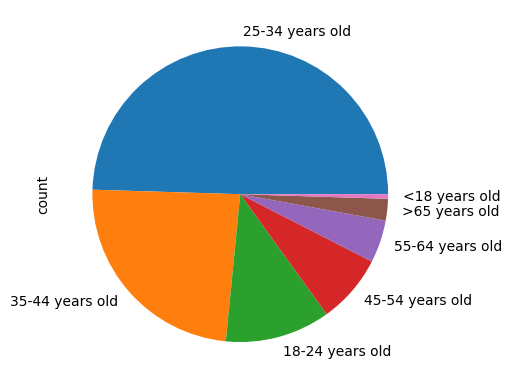

In [10]:
import matplotlib.pyplot as plt
edades = procesar_columna(df, "age")
edades.plot.pie()
# 11. Gráfico de grupos etarios


12. Realice un gráfico de barras para cada grupo etario, mostrando cuántos consumidores prefieren cada tipo de café.

    **Ayuda**: investigue los métodos  `size` y `unstack`. Puede usar una estructura de repetición for para la creación de los gráficos, que le permita en cada iteración graficar la información correspondiente a cada grupo etario.

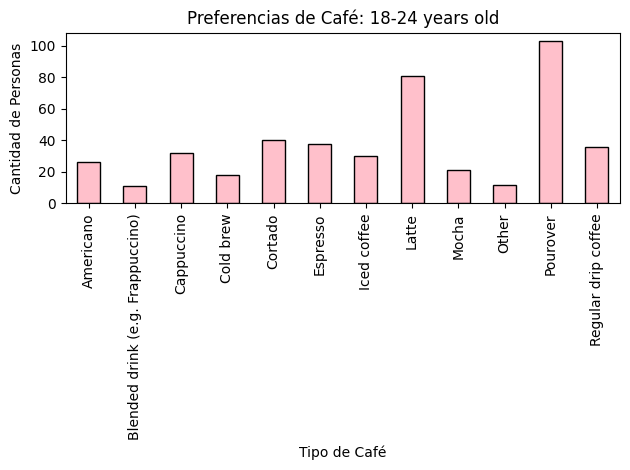

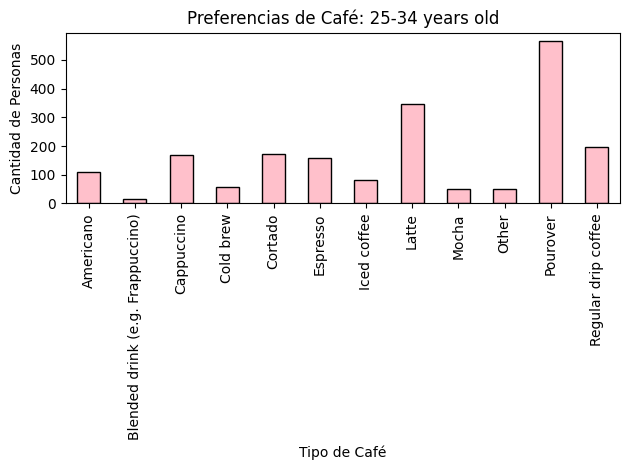

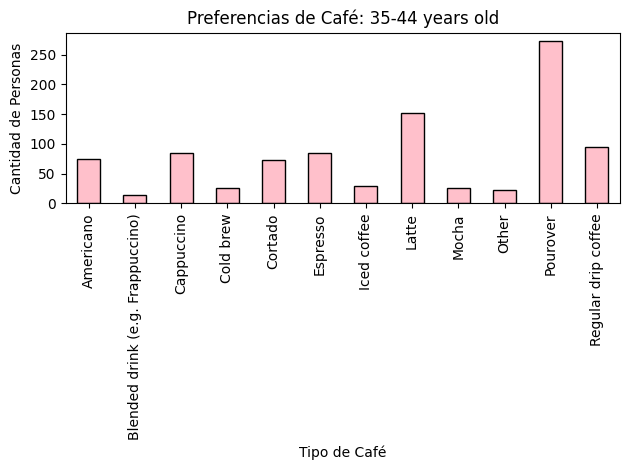

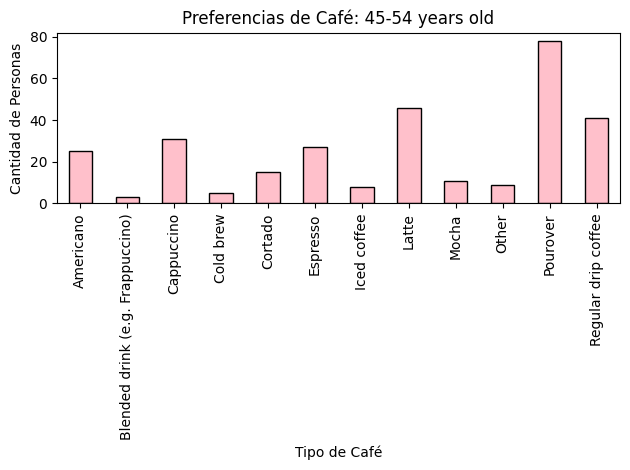

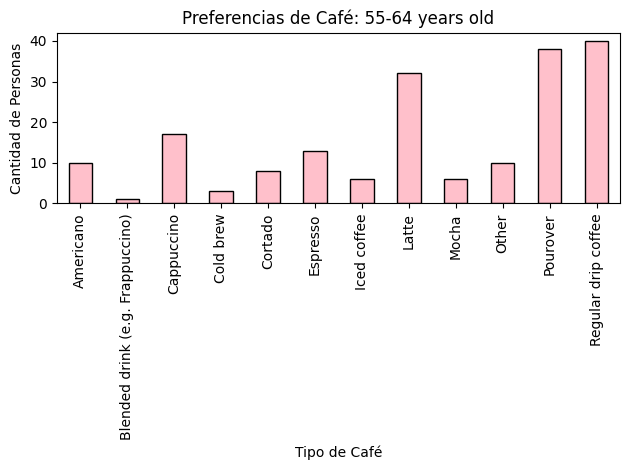

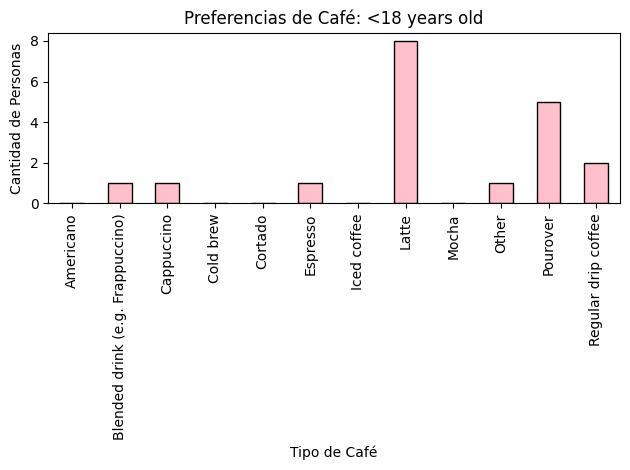

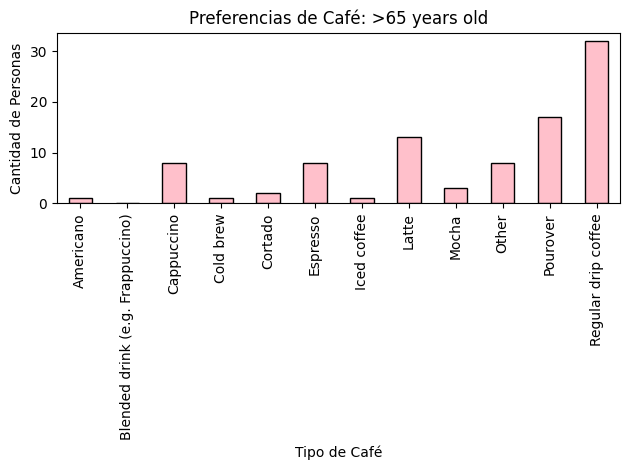

In [11]:
# 12. Gráfico de café favorito por grupos etarios
datos_agrupados = df.groupby(['age', 'favorite']).size().unstack(fill_value=0)

for grupo_etario in datos_agrupados.index:
  datos_a_graficar = datos_agrupados.loc[grupo_etario]

  #plt.figure(figsize=(10, 6))
  datos_a_graficar.plot(kind="bar", color = "pink", edgecolor = "black")

  plt.title(f'Preferencias de Café: {grupo_etario}')
  plt.xlabel('Tipo de Café')
  plt.ylabel('Cantidad de Personas')
  plt.tight_layout()

  plt.show()




13. Calcule el nivel educativo más frecuente entre los consumidores que respondieron la encuesta.


In [12]:
# Nivel educativo más frecuente
df.groupby("education_level")["education_level"].count().sort_values(ascending=False)


,education_level
education_level,
Bachelor's degree,1759
Master's degree,738
Some college or associate's degree,461
Doctorate or professional degree,340
High school graduate,118
Less than high school,22


**13-** **Conclusiones:**

Realice un análisis exhaustivo de los datos cargados en el `DataFrame` llamado `encuesta` recién creado. ¿Qué información relevante se puede extraer? Puede ayudarse de los gráficos o imprimir en pantalla información de este `DataFrame`. Reflexione sobre las conclusiones que se pueden obtener a partir de esta información.

Además, ¿qué recomendaciones ofrecería a su cliente para optimizar su cafetería? Por ejemplo, ¿a qué segmentos de clientes debería orientar su campaña de marketing para maximizar el impacto y atraer a más consumidores?

*Complete aquí sus conclusiones*